Ноутбук по мотивам упражнения 6.5.5 из книги *Probability and Random Processes GRIMMETT and STIRZAKER*

Также эта штука рассматривается в *example 6.5.5. Ehrenfest model of diffusion* 

(либо две собаки, на которых в сумме сидит $m$ блох, и в каждый момент времени одна случайно перескакивает, либо два сосуда с $m$ молекулами, и одна молекула каждый момент времени переходит в другой сосуд по трубочке) 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
import seaborn as sns
from scipy import stats

Марковская цепь с $p_{i, i+1} = 1 - \frac{i}{m}$ и $p_{i, i-1} = \frac{i}{m}$. Построим transition matrix:

In [3]:
M = 10
d = np.arange(M) + 1

`np.diag()` либо достает диагональ из матрицы (если первый аргумент - матрица), либо создает матрицу с нулями и одномерным массивом на k-й диагонали (k=0: главная)

In [32]:
np.diag(d, k=-1) / M

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

In [4]:
P = np.diag(d, k=-1) / M + np.diag(d[::-1], k=+1) / M
P

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.3, 0. , 0.7, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.4, 0. , 0.6, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0. , 0.3, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

Для симуляции будем использовать функцию, которая по стартовому распределению и числу шагов будет возвращать историю распределений `V` и стационарное распределение: $Bin(m, 0.5)$ `B`:

In [34]:
def distr(s_distr, n):
    m = len(s_distr) - 1
    d = np.arange(m) + 1
    P = np.diag(d, k=-1) / m + np.diag(d[::-1], k=+1) / m  # transition matrix
    
    V = np.zeros((n + 1, m + 1))  # история расределений
    V[0, :] = s_distr
    
    for i in range(n):  # заполняем историю распределений
        s_distr = s_distr @ P
        V[i + 1, :] = s_distr
        
    t = np.arange(m + 1)  # cтационарное распределение
    B = stats.binom.pmf(t, m, 0.5)
    
    return t, V, B

# Сценарий 1: $X_0$ известно

Итак, пусть цепь начинается с точки `start`: в начальном распределении это состояние будет иметь вероятность $1$.

In [6]:
m = 5
start = 3
s_distr = np.zeros(m + 1)
s_distr[start] = 1
t, V, B = distr(s_distr, 10 ** 3)

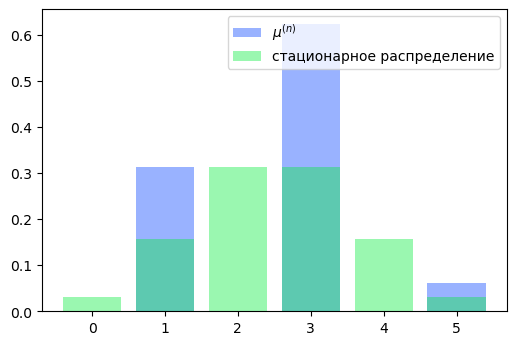

In [8]:
plt.figure(dpi=100)

plt.bar(t, V[-1, :], alpha = 0.4, label=r'$\mu^{(n)}$')
plt.bar(t, B, alpha = 0.4, label='стационарное распределение')

plt.legend(frameon=True);

Разгадка такой странной формы - цепь в **не апериодична**! 

Даже более сильная версия *ergodic theorem* требудет апрериодичности для сходимости $\mu^{(n)}$ к $\pi$.

У нас же вот такая картина:

In [9]:
V[-10:, :].round(3)

array([[0.063, 0.   , 0.625, 0.   , 0.313, 0.   ],
       [0.   , 0.313, 0.   , 0.625, 0.   , 0.063],
       [0.063, 0.   , 0.625, 0.   , 0.313, 0.   ],
       [0.   , 0.313, 0.   , 0.625, 0.   , 0.063],
       [0.063, 0.   , 0.625, 0.   , 0.313, 0.   ],
       [0.   , 0.313, 0.   , 0.625, 0.   , 0.063],
       [0.063, 0.   , 0.625, 0.   , 0.313, 0.   ],
       [0.   , 0.313, 0.   , 0.625, 0.   , 0.063],
       [0.063, 0.   , 0.625, 0.   , 0.313, 0.   ],
       [0.   , 0.313, 0.   , 0.625, 0.   , 0.063]])

# Сценарий 2: $X_0$ равномерно распредлен на $\{0, 1, ... m\}$

In [10]:
m = 5
s_distr = np.ones(m + 1) / (m + 1)
t_5, V_5, B_5 = distr(s_distr, 10 ** 3)

In [11]:
m = 6
s_distr = np.ones(m + 1) / (m + 1)
t_6, V_6, B_6 = distr(s_distr, 10 ** 3)

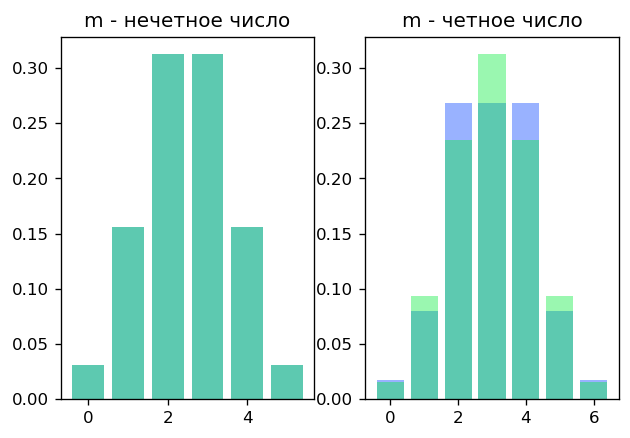

In [12]:
fig, ax = plt.subplots(ncols=2, dpi=120)

ax[0].bar(t_5, V_5[-1, :], alpha = 0.4, label=r'$\mu^{(n)}$')
ax[0].bar(t_5, B_5, alpha = 0.4, label='стационарное распределение')
ax[0].set(title='m - нечетное число')

ax[1].bar(t_6, V_6[-1, :], alpha = 0.4, label=r'$\mu^{(n)}$')
ax[1].bar(t_6, B_6, alpha = 0.4, label='стационарное распределение')
ax[1].set(title='m - четное число');

В чем прикол?

Если $X_0$ <span style="color: blue;">четно</span>, то на шагах $0, 2, 4, ...$ может быть только <span style="color: blue;">четное</span> число (положительные вероятности имеют только четные столбики). 

Если $X_0$ <span style="color: red;">нечетно</span>, то на шагах $0, 2, 4, ...$ может быть только <span style="color: red;">нечетное</span> число (положительные вероятности имеют только нечетные столбики). (это можно видеть в сценарии 1)

Когда $m$ - нечетное число, то всего столбиков, включая 0, четное число, среди которых *поровну четных и нечетных*, и они, появляясь равновероятно, компенсируют друг друга. Когда же $m$ четно, этой компенсации не происходит.

Вопрос на будущее: есть ли тут связь с **recurrent events**, где мы могли позволить времени первого появления события иметь особое распределение (как в нашем случае с $X_0$)?

# Сценарий 3: $X_0 \sim Bin(m, 0.5)$

Тут все понятно:)

In [13]:
m = 5
s_distr = stats.binom.pmf(np.arange(m + 1), m, 0.5)
t, V, B = distr(s_distr, 10 ** 3)

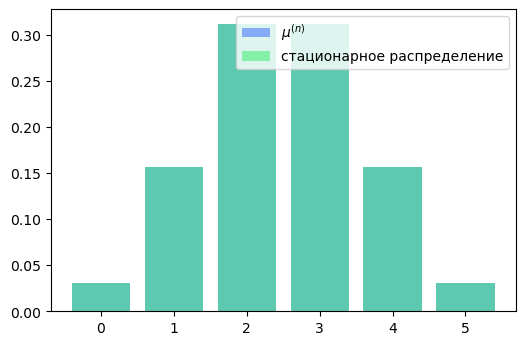

In [14]:
plt.figure(dpi=100)

plt.bar(t, V[1, :], alpha = 0.4, label=r'$\mu^{(n)}$')
plt.bar(t, B, alpha = 0.4, label='стационарное распределение')

plt.legend(frameon=True);

In [15]:
V[[0, 1, 10, 200, 999], :]  # :)

array([[0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125]])

# Bonus: подсчет $\mathbb{E}[X_n - \frac{m}{2} | X_0 = i]$

В *ex. 6.5.5* нужно показать, что $$\mathbb{E}[X_n - \frac{m}{2} | X_0 = i] = (i - \frac{m}{2})(1 - \frac{2}{m})^n \to 0$$ при $n \to \infty$.

Убедимся в этом!

In [16]:
m = 5
i = 3
n = 10 ** 2
s_distr = np.zeros(m + 1)
s_distr[i] = 1
t, V, B = distr(s_distr, n)
N = np.arange(n + 1)

In [17]:
E = (t * V).sum(axis=1)
E[:5]

array([3.    , 2.8   , 2.68  , 2.608 , 2.5648])

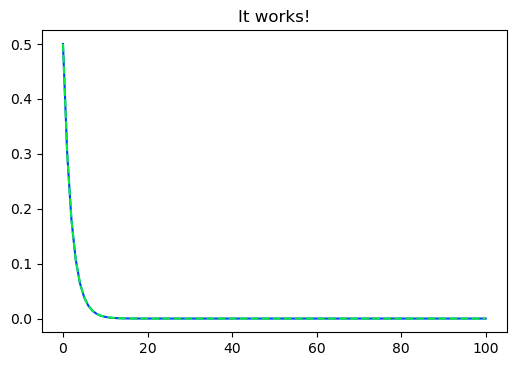

In [18]:
plt.figure(dpi=100)

plt.plot(N, E - m / 2)
plt.plot(N, (i - m / 2) * (1 - 2 / m) ** N, '--')

plt.title('It works!');

# Bonus 2: симулируем реализацию MC

Воспользуемся матрицей `P` из начала ноутбука:

In [5]:
# реализация марковской цепи
S = np.arange(M + 1)
def chain(P: 'transition matrix', n: 'number of steps', state: 'start'):  # безо всякой рекурсии :)
    steps = []
    for i in range(n):
        state = np.random.choice(S, size=1, p=P[state, :].flatten())[0]
        steps.append(state)
    return np.array(steps)

In [6]:
chain(P, 10, 2)

array([3, 2, 3, 4, 5, 6, 7, 6, 5, 4])

In [8]:
np.random.seed(230)
n = 10 ** 4
t = np.arange(n)
values = np.arange(M + 1)
c = chain(P, n, stats.binom.rvs(n=M, p=0.5, size=1)[0])

**Похоже ли это на выборку из биномиального распределения?** 

Сравним наблюдаемые частоты с вероятностями:

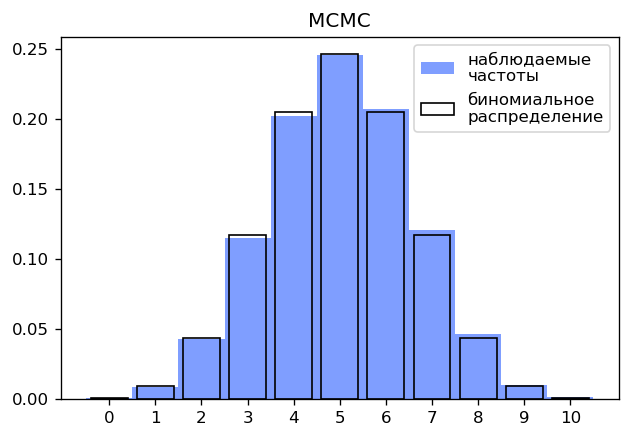

In [9]:
plt.figure(dpi=120)

plt.hist(c, bins=np.r_[values, M + 1] - 0.5, 
         alpha=.5, density=True, label='наблюдаемые\nчастоты')

plt.bar(values, stats.binom.pmf(values, M, 0.5), 
        ec='k', color='None', alpha=1, label='биномиальное\nраспределение')

plt.xticks(ticks=values)
plt.legend()
plt.title('MCMC');

Кажется, это действительно так, но вроде бы "сходится" процесс довольно медленно (на цепи длиной 1000 еще могло быть что-то очень непохожее)

*Во времени* же случайные величины выглядят вот так: они зависимы от предыдущего значения!

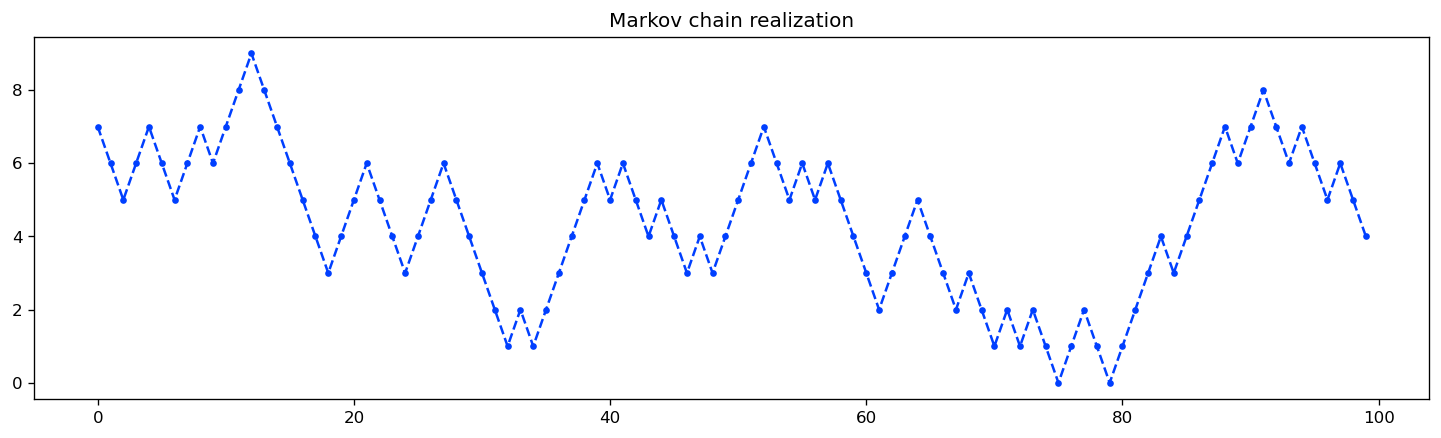

In [11]:
plt.figure(dpi=120, figsize=(15, 4))

plt.plot(t[:100], c[:100], '.--')

plt.title('Markov chain realization');